---
title: "Derivatives II"
format: 
  html:
    toc: true
    code-fold: false
    page-layout: full
    fig-cap-location: bottom
    number-sections: true
    number-depth: 2
    html-to-math: katex
    html-math-method: katex
jupyter: python3
---

#  Richardson Extrapolation
We now turn to a nice technique, called _Richardson extrapolation_, which can be used to improve accuracy of a numerical algorithm. Here we apply it to finite-difference formulas,
but its applicability is much wider.

## General Formulation
Assume your task is to evaluate the quantity $G$. Let's say that $G$ is the exact answer of the calculation that you are currently trying to carry out approximately. Your approximate answer $g(h)$ depends on a parameter $h$, which is typically an increment, or step size. We write
$$
G=g(h)+\mathcal{E}_{app}(h).
$$
Note that we neglect the roundoff error because this procedure only reduces the approximation error.

We will now make the (pretty widely applicable) assumption that the error term can be written as a sum of powers of $h$:
$$
G = g(h) + Ah^p + Bh^{p+q} + Ch^{p+2q} + \cdots
$${#eq-error-expansion}
where $A$, $B$, $C$ are constants, $p$ denotes the order of the leading error term and $q$ is the increment in the order for the error terms after that.
The idea behind Richardson extrapolation is to apply @eq-error-expansion twice, once for a step size $h$ and once for a step size $h/2$:
$$
\begin{gather*}
G = g(h) + Ah^p + O(h^{p+q}) \\
G = g(h/2) + A\left(\frac{h}{2}\right)^p + O(h^{p+q}).
\end{gather*}
$$

Equating the two right hand sides gives us
$$
g(h) + Ah^p = g(h/2) + A\left(\frac{h}{2}\right)^p + O(h^{p+q}).
$$
We then have
$$
Ah^p  = \frac{2^p}{2^p - 1} \left[g(h/2) - g(h)\right] + O(h^{p+q}).
$$

Thus, we have
$$
G = \frac{2^pg(h/2)-g(h)}{2^p - 1} + O(h^{p+q}).
$${#eq-extrapolate}
This is called an _extrapolated value_.

To summarize, we started with a formula with a leading error $O(h^p)$. We eliminate this error term by computing the function with the parameter $h$ and $h/2$, and we are left with the error $O(h^{p+q})$. We can proceed similarly, by making two calculations with leading error $O(h^{p+q})$ and then eliminate it again. 

## Finite Differences
We now apply @eq-extrapolate to finite-difference formulas.

### Forward Difference
- We will use our first forward-difference formula
$$
D_{fd}(h) = \frac{f(x+h) - f(x)}{h}.
$$
- The leading error is $O(h)$, meaning that $p=1$. 
- Richardson extrapolation will eliminate this error term, leaving us the $O(h^2)$ error
- Applying @eq-extrapolate for $p=1$, gives
$$
\begin{align}
R_{fd} &= 2D_{fd}(h/2) - D_{fd}(h) + O(h^2) = 2\frac{f(x+\frac{h}{2}) - f(x)}{h/2} - \frac{f(x+h) - f(x)}{h} + O(h^2) \nonumber \\
& = \frac{4 f(x + \frac{h}{2}) - f(x+h) - 3f(x)}{h} + O(h^2). 
\end{align}
$$
- This result is _identical_ to the second forward-difference formula. 

### Central Difference
We now apply the Richardson extrapolation to the central-difference formula,
$$
D_{cd}(h) = \frac{f(x+h/2) - f(x - h/2)}{h}.
$$
- The leading error is $O(h^2)$, meaning $p = 2$.
- Note that all error terms are of order $O(h^{2n})$ for $n\in\mathbb{Z}$, this means $q=2$.
- Richardson formula will eliminate the leading error $O(h^2)$, giving rise to the next order of error $O(h^4)$.
- Applying Richardson formula
$$
\begin{align}
R_{cd} &= \frac{4}{3}D_{cd}(h/2) - \frac{1}{3}D_{cd}(h) + O(h^4) \nonumber \\
&= \frac{4}{3} \frac{f(x+h/4)- f(x-h/4)}{h/2} - \frac{1}{3}\frac{f(x+h/2)-f(x-h/2)}{h} + O(h^4) \nonumber \\
&= \frac{8f(x+h/4) + f(x-h/2) - (x+h/2) -8f(x-h/4)}{3h} + O(h^4).
\end{align}
$$
- This is _identical_ to the second central-difference formula.

### Numerical results

In [2]:
from math import exp, sin, cos, log10
def f(x):
    return exp(sin(2*x))

def fprime(x):
    return 2*exp(sin(2*x))*cos(2*x)

def calc_fd(f,x,h):
    fd = (f(x+h) - f(x))/h
    return fd

def calc_cd(f,x,h):
    cd = (f(x+h/2) - f(x-h/2))/h
    return cd
if __name__ == '__main__':
    x = 0.5
    an = fprime(x) # Analytical result

    hs = [10**(-i) for i in range(1,7)]

    rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
    print("h     abs. err. rich fd  abs. err. rich cd")
    for h in hs:
        fdrich = 2*calc_fd(f,x,h/2) - calc_fd(f,x,h) # forward-difference Richardson
        fd = abs(fdrich-an) 
        cdrich = (4*calc_cd(f,x,h/2) - calc_cd(f,x,h))/3 # -difference Richardson
        cd = abs(cdrich-an)
        print(rowf.format(h,fd,cd))

h     abs. err. rich fd  abs. err. rich cd
1e-01 0.0259686059827384 0.0000098728370874
1e-02 0.0002695720500006 0.0000000009897421
1e-03 0.0000027005434182 0.0000000000011098
1e-04 0.0000000270109117 0.0000000000043667
1e-05 0.0000000003389138 0.0000000000280513
1e-06 0.0000000006941852 0.0000000002500959


#### Forward-difference results
- Every time we reduce $h$ by an orderr of magnitude, the absolute error is reduced by two orders of magnitude, consistent with $O(h^2)$
- This process reaches a minimum at $h = 10^{-5}$, with absolute error $3\times 10^{-10}$.

#### Central-difference resutls
- The first time $h$ is reduced from $10^{-1}$ to $10^{-2}$, the absolute error reduced by four orders of magnitude, consistent with error $O(h^4)$.
- This cannot contiue indefinitely, and in the next step the error improves by three orders of magnitude reaching the minimum at $h=10^{-3}$, with absolute error $10^{-12}$.
- As $h$ is further reduced, roundoff error starts dominating, so the extrapolation is no longer reliable.

## Project: Local Kinetic Energy in Quantum Mechanics
- The kinetic energy in quantum mechanics involves second order derivatives (in position basis).
- In quantum mechanics, a particle is characterized by its _Hamiltonian_ $\hat{H} = \hat{T} + \hat{V}$
- $\hat{T}$ is the kinetic energy operator, $\hat{V}$ is the potential energy operator
- Given the Hamiltonian, the possible states the particle can have is determined by its wave functions $\psi$, which satisfy the Schrödinger equation  
$$
\hat{H}\psi = E\psi
$$
- $E$ is the eigenvalue.

### Single-particle wave functions in one dimension
#### Quantum Harmonic Oscillator
- The Hamiltonian is
$$
\hat{H}  = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + \frac{1}{2}m\omega^2 x^2
$$
- The first term is the kinetic energy $\hat{T} = \frac{\hat{p}^2}{2m}$, with momentum operator $\hat{p} = -i\hbar\frac{d}{dx}$.
- The second term is the potential, corresponding to particle in a harmonic potential, where $\omega$ corresponding to the angular frequency of the oscillator.
- The Schrödinger equation is
$$
-\frac{\hbar^2}{2m}\frac{d^2 \psi(x)}{dx^2} + \frac{1}{2}m\omega^2 x^2\psi(x) = E\psi(x).
$$
- The possible energy eigenvalues are 
$$
E_n = (n + \frac{1}{2})\hbar \omega
$$
and the (normalized eigenfunctions)
$$
\psi_n(x)  = \frac{1}{\sqrt{2^n n!}} \left( \frac{m\omega}{\pi \hbar}\right)^{1/4} H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right)e^{-m\omega x^2/(2\hbar)}
$$
- Both the eigenvalues and eigenfunctions are labeled by a discrete index $n$: this goes to the heart of _quantization_.
- For a given $n$, the harmonic-oscillator wave function is a Gaussian term and a _Hermite polynomial_, $H_n(x)$.
- Hermite polynomial obey the _recurrence relation_:
$$
H_{j+1}(x) = 2xH_j(x) - 2jH_{j-1}(x).
$${#eq-recurrence}
- To calculate $H_n(x)$, we start from $H_0(x) = 1$ and $H_1(x) = 2x$, and apply @eq-recurrence for $j = 1,2,\dots, n-1$.
- For derivatives, we have
$$
H_n'(x) = 2n H_{n-1}(x).
$$

In the following, we compute the Hermite polynomial numerically.

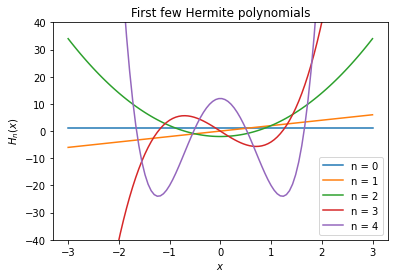

In [35]:
import numpy as np
import matplotlib.pyplot as plt
# Compute Hermite polynomial of order n, and its first order derivative
def hermite(n,x):
    if n == 0:
        val2 = np.ones_like(x)*1.
        dval2 = np.zeros_like(x)*0.
    elif n == 1:
        val2 = 2*x
        dval2 = np.ones_like(x)*2
    else:
        val0 = np.ones_like(x)*1.
        val1 = 2*x
        val2 = 0.
        for j in range(1,n):
            val2 = 2*x*val1 - 2*j*val0
            val0, val1 = val1, val2
        dval2 = 2*n*val0
    return val2, dval2

x = np.linspace(-3,3,100)
for nn in range(5):
    val2, dval2 = hermite(nn,x)
    plt.plot(x,val2,label='n = '+str(nn))
plt.legend()
plt.ylim([-40,40])
plt.xlabel(r'$x$')
plt.ylabel(r'$H_n(x)$')
plt.title('First few Hermite polynomials')
plt.show()

#### Particle in a Periodic Box
- We study a particle in a periodic box, goes from $-L/2$ to $L/2$ (of length $L$ and periodic). 
- The Sch&ouml;dinger equation is
$$
-\frac{\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2} = E\psi(x)
$$
- The wave functions are plane waves
$$
\psi_k(x) = \frac{1}{\sqrt{L}}e^{ikx}.
$$
- The prefactor is such that the wave function is normalized, namely $\int_{-\infty}^\infty dx |\psi_k(x)|^2 = 1$.
- We have labeld the quantum number as the wave number $k = p/\hbar$.
- The periodic condition defines the boundary condition $\psi_k(x) = \psi_k(x+L)$ for the wave function. 
- This means $\exp(ikx) = \exp(ik(x+L))$, implying $\exp(ikL) = 1$, or
$$
k = \frac{2\pi n}{L}, \quad n \in \mathbb{Z}.
$$
- The energy eigenvalue for the state with quantum number $k$ is
$$
E = \frac{\hbar^2k^2}{2m} = \frac{\hbar^2}{2m}\left(\frac{2\pi}{L}\right)^2 n^2.
$$

### Evaluate kinetic energy
- We define the local kinetic energy
$$
T_L = \frac{\hat{T}\psi}{\psi}
$$
- In general, this quantity will depend on the position $x$.
- For harmonic oscillator, we find
$$
T_L = (n + \frac{1}{2})\hbar \omega - \frac{1}{2}m\omega^2 x^2.
$$
- For a particle  in a periodic box, since there is no potential energy, the total energy will be the same as the kinetic energy. 
- The kinetic energy involves second order derivative, with a prefactor $-\frac{\hbar^2}{2m}$. We shall use
$$
\frac{d^2 \psi(x)}{d x^2} \simeq \frac{\psi(x + h) + \psi( x - h) - 2f(x)}{h^2}.
$$

- See the following implementation, where we fix $\hbar^2/m = 1$ and $m\omega/\hbar = 1$, which means we measure the energy in unit of $\hbar \omega$.
- At $x = 1$, we have
$$
\frac{1}{2}m\omega^2 x^2 = \frac{1}{2} \hbar \omega.
$$

- For quantum harmonic oscillator, we have
$$
T_L(x=1) = n\hbar \omega. 
$$

In [38]:
from math import sqrt, pi, factorial
import numpy as np

def hermite(n,x):
    if n == 0:
        val2 = 1.
        dval2 = 0.
    elif n == 1:
        val2 = 2*x
        dval2 = 2.
    else:
        val0 = 1.
        val1 = 2*x
        val2 = 0.
        for j in range(1,n):
            val2 = 2*x*val1 - 2*j*val0
            val0, val1 = val1, val2
        dval2 = 2*n*val0
    return val2, dval2


def psiqho(x,nametoval):
    n = nametoval["n"]
    m_omega_hbar = nametoval["m_omega_hbar"]          # \frac{m \omega}{\hbar}
    psival =m_omega_hbar**0.25*np.exp(-0.5*m_omega_hbar * x**2) 
    psival *= hermite(n,sqrt(m_omega_hbar)*x)[0]
    psival /= sqrt(2**n * factorial(n) * sqrt(pi))
    return psival

def psibox(x,nametoval):
    n = nametoval["n"]
    boxl = nametoval["boxl"]
    return np.exp(2*pi*n*x*1j/boxl)


def kinetic(psi,x,nametoval,h=0.005):
    hom = 1.
    psiold = psi(x,nametoval)
    psip = psi(x+h,nametoval)
    psim = psi(x-h,nametoval)

    lapl = (psip + psim - 2.*psiold)/h**2
    kin = -0.5*hom*lapl/psiold
    return kin

def test_kinetic():
    x = 1.
    hs = [10**(-i) for i in range(1,6)]

    nametoval = {"n": 100, "m_omega_hbar": 1.}
    qhos = [kinetic(psiqho,x,nametoval,h) for h in hs]
    nametoval = {"n": -2, "boxl": 2*pi}
    boxs = [kinetic(psibox,x,nametoval,h) for h in hs]

    rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
    print("h     qho                 box")
    for h,qho,box in zip(hs,qhos,boxs):
        print(rowf.format(h,qho,box))

if __name__ == '__main__':
    test_kinetic()

h     qho                 box
1e-01 83.7347487381334759 1.9933422158758423+0.0000000000000064j
1e-02 99.8252144561287480 1.9999333342228847+0.0000000000009856j
1e-03 99.9982508976935520 1.9999993333159836-0.0000000000516305j
1e-04 99.9999829515395646 1.9999999988482300-0.0000000002804216j
1e-05 99.9997983578354876 1.9999999227612257+0.0000011797609069j


- For quantum harmonic oscillator, at $n=100$, $x=1$, the exact result should be $100$ in unit of $\hbar \omega$.
- For a particle in a periodic box, we should get
$$
E_{n=-2} = \frac{\hbar^2}{2m} (-2)^2 = 2.
$$
- Upon reducing the discretization step size $h$, the error first descreases and then increases. 

## Homework
1. Produce a table of $x_i$ and $e^{\sin(2x_i)}$ values, where $x_i$ goes from 0 to 1.6 in steps of 0.08. 

    a. Plot the forward-difference and central-difference results (for the first derivative) given these values. (Hint: if you cannot produce a result for a specific $x$, don’t.) Then, introduce a curve for the analytical derivative.

    a. Use Richardson extrapolation for the forward difference for points on a grid and add an extra set of points to the plot. You can use:
    $$
    R_{fd} = 2D_{fd}(h) - D_{fd}(2h) + O(h^2)
    $$